In [1]:
#Google's quick draw dataset is the world's largest doodles database
#and is probably becoming a wide accessable public playground for anyone to study recognization, strokes etc
#it has more than 300 catagories and millions of doodles, contains contry, location, time information etc
#I would like play with some of these data, the whole dataset is more than 10G
#step1 load and show the data, doodles
#step2 the statistic properties, like distribution, characteristic for different contries
#step3 train a model to classify the images

In [2]:
import pandas as pd
import numpy as np
import random as nd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import json
import glob
import seaborn as sns
plt.style.use('ggplot')
base_dir = os.path.join('/Users/wencaoyang/Downloads', 'quickdraw_simplified')
print base_dir

/Users/wencaoyang/Downloads/quickdraw_simplified


In [3]:
obj_files = glob.glob(os.path.join(base_dir, '*.ndjson'))
print(len(obj_files), 'categories found!', 'first is:', obj_files[0])

(345, 'categories found!', 'first is:', '/Users/wencaoyang/Downloads/quickdraw_simplified/strawberry.ndjson')


In [4]:
objs = pd.read_json(obj_files[0], lines = True)#show the first one

In [5]:
objs.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[18, 16, 23, 65, 98, 108, 118, 140, 145, 145...",4939782322913280,True,2017-01-26 14:14:31.929500,strawberry
1,US,"[[[161, 123, 61, 23, 13, 2, 0, 17, 37, 63, 83,...",5245454184873984,True,2017-03-20 04:58:50.400980,strawberry
2,CA,"[[[7, 24, 69, 93, 119, 127, 135, 132, 121, 109...",5023236788060160,True,2017-03-03 00:54:57.643640,strawberry
3,US,"[[[55, 52, 5, 0, 0, 5, 37, 92, 118, 128, 141, ...",6105061857951744,True,2017-03-28 18:48:06.019710,strawberry
4,US,"[[[90, 72, 38, 68, 93], [56, 36, 22, 25, 39]],...",4506330360446976,True,2017-03-01 00:45:06.157960,strawberry


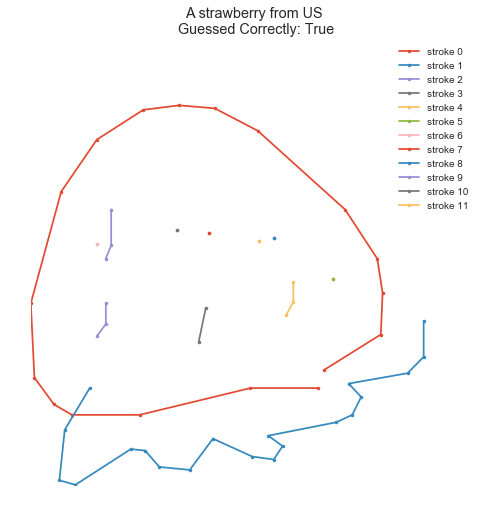

In [6]:
def draw_obj(objs, ax, index,legend = True):
    for i, (x_coord, y_coord) in enumerate(objs.iloc[index]['drawing']):
        ax.plot(x_coord, y_coord, '.-', label = 'stroke {}'.format(i))
    ax.set_title('A {word} from {countrycode}\n Guessed Correctly: {recognized}'.format(**objs.iloc[index]))
    ax.axis('off')
    ax.legend()
#test the drawing
fig, ax1 = plt.subplots(1, 1, figsize = (8,8))
draw_obj(objs, ax1, 1)

In [ ]:
#show more categories
def multi_ndjson(obj_files,number, shuffle = True):
    json_readers = []
    for i in xrange(number):
        json_readers.append(pd.read_json(obj_files[nd.randin(0,344)], lines = True))
    return json_readers
nd_gen = multi_ndjson(obj_files,9)

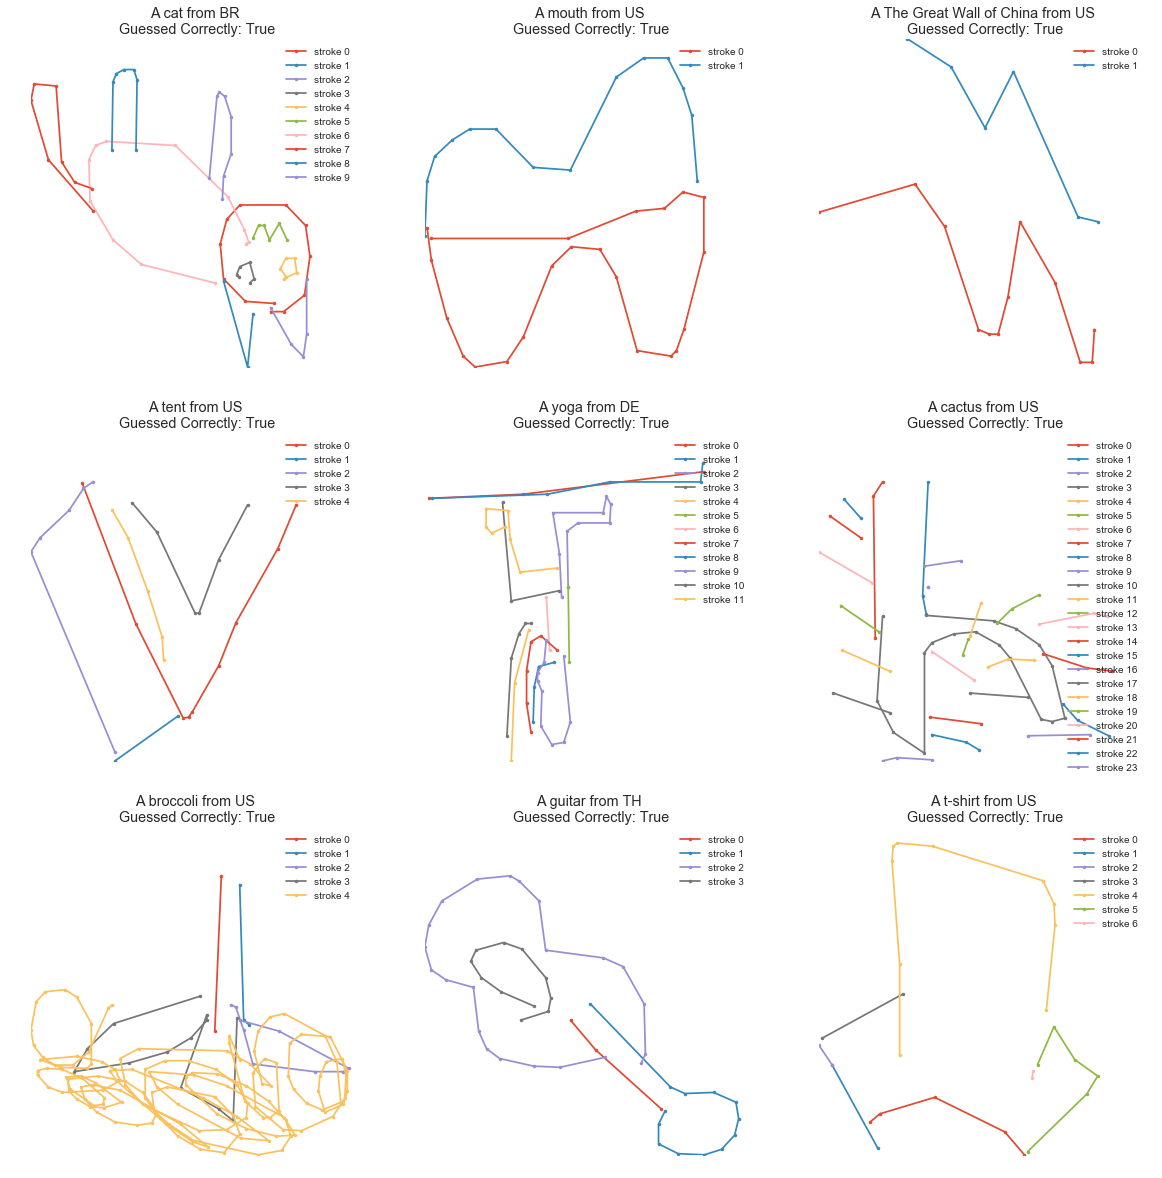

In [17]:
fig, axs = plt.subplots(3, 3, figsize = (20,20))
for obj, ax in zip(nd_gen, axs.flatten()):
    draw_obj(obj, ax, 1)

In [10]:
#statistics
def stat(objs):
    n_strokes = []
    for i in xrange(len(objs)):
        n_strokes += [len(objs.iloc[i]['drawing'])]
    return n_strokes

In [16]:
#statistics visulization
def stst_visulization(objs,n_strokes):
    fig, ax1 = plt.subplots(1, 1, figsize = (8, 8))
    ax1.hist(n_strokes, np.arange(50))
    ax1.set_title('Number of Strokes')
    print('This is:',objs.iloc[0]['word'])
    print('Max Strokes', np.max(n_strokes))

('This is:', u'firetruck')
('Max Strokes', 319)


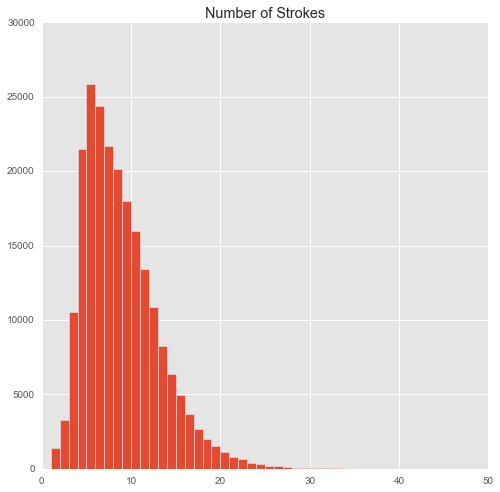

In [17]:
objs1 = pd.read_json(obj_files[1], lines = True)
n_strokes1 = stat(objs1)
stst_visulization(objs1,n_strokes1)

('This is:', u'fork')
('Max Strokes', 260)


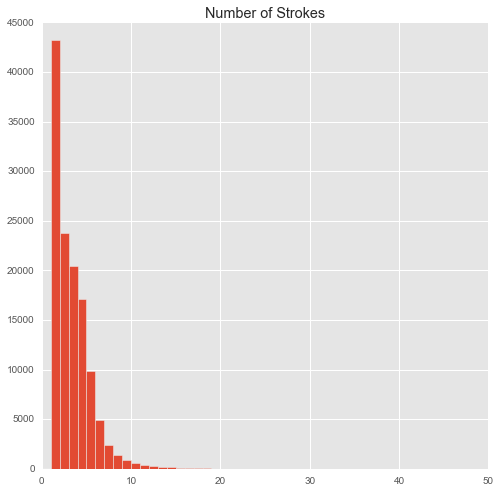

In [18]:
objs2 = pd.read_json(obj_files[2], lines = True)
n_strokes2 = stat(objs2)
stst_visulization(objs2,n_strokes2)

In [ ]:
#It's clear that for different object, it requires different number of strokes

In [ ]:
#summary
#something interesting I can do is averaging the doodles for different contries and see if there is any interesting pattern
#and I need to be careful to pick the doodle object, which should be good for averaging

In [ ]:
#the next step is to develop a model to classify different doodles